In [1]:
import scanpy as sc
#import scvi
import muon as mu
import scib

In [2]:
mudata = mu.read("/home/icb/dominik.klein/git_repos/moscot_revisions/scMultiome_Mouse-Islets_NVF_E14-E16/scMultiome_Mouse-Islets_NVF_E14-E16_mdata_markedDoublets_mergedPeaks_normalized_rmDoublets.h5mu")

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [3]:
adata_gex = mudata["rna"]
#adata_gex = adata_gex[:, adata_gex.var.highly_variable].copy()

In [4]:
adata_gex.X = adata_gex.layers["raw_counts"]

In [5]:
sc.pp.normalize_total(adata_gex)
sc.pp.log1p(adata_gex)
sc.pp.pca(adata_gex)
sc.pp.neighbors(adata_gex)
sc.tl.umap(adata_gex)

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


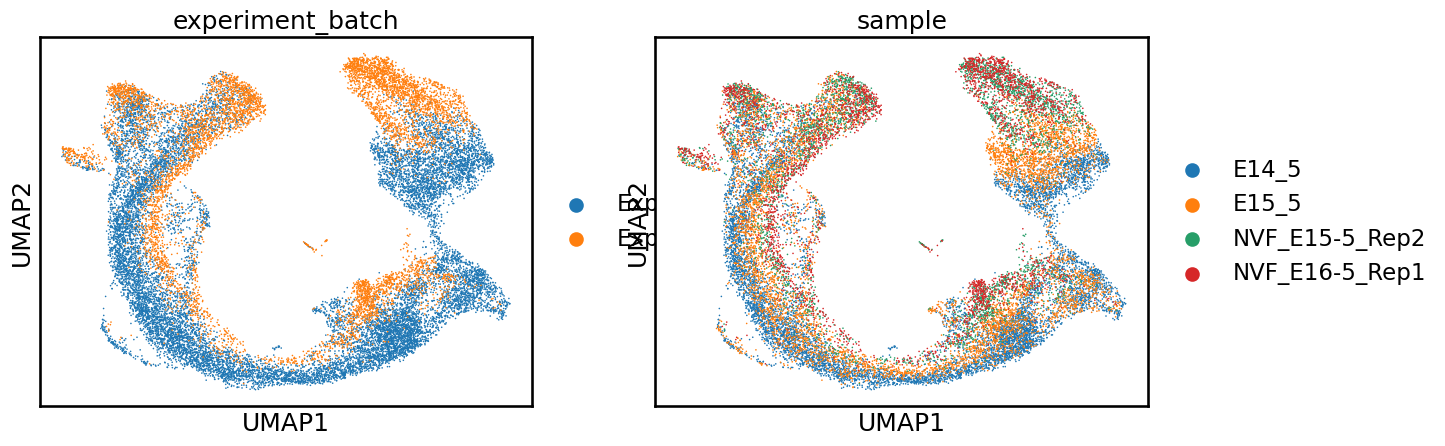

In [6]:
sc.pl.umap(adata_gex, color=["experiment_batch", "sample"])

In [50]:
adata_atac = mudata["atac"]

In [51]:
adata_atac.X = adata_atac.layers["atac_raw_counts"]


In [52]:
mu.atac.pp.tfidf(adata_atac, scale_factor=1e4)

In [24]:
#sc.pp.highly_variable_genes(adata_atac, min_mean=0.05, max_mean=1.5, min_disp=.5)


/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_array.dtype], [])
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
Se

In [56]:
mu.atac.tl.lsi(adata_atac)

In [57]:
for i in range(49):
    print(np.corrcoef(adata_atac.obsm["X_lsi"][:,i], adata_atac.obs["n_counts_ATAC"])[0,1])

-0.857462721340703
0.21367415812321963
0.07125358000902503
-0.020025341405651223
0.20685659453081268
-0.01276671754340285
-0.32472960779668114
-0.006507928957289413
-0.07303848755929973
-0.19242903696837185
0.1425453845321943
0.08076618667213761
0.044298378999201866
0.11210362817581163
-0.06741000093280256
-0.030804059891146218
-0.11100203497653571
-0.05817387925402475
0.06691625675184767
-0.007950852494438282
0.0712969877720114
0.017898475992508517
0.007714863408208113
-0.0175393047776253
0.019996504146873904
0.07708418630626644
0.002438328850224632
-0.07565910437493029
0.0963865357440635
-0.030685298160372434
-0.026978242192130106
0.09694972887438869
0.07903821814395728
0.06188024515791111
0.02186408349901846
-0.03294585716584089
0.01320961841759551
-0.009295020428217506
-0.1545276145602575
-0.01559673919314499
0.013445487045606327
0.11578295178822294
0.008271405546904686
-0.000854705514187838
0.008070778834605108
-0.008525613155115032
-0.015052445642782054
0.03908656858019716
0.0337

In [62]:
to_keep = list(set(range(adata_atac.obsm["X_lsi"].shape[1])) - {0, 6})
adata_atac.obsm["X_lsi_red"] = adata_atac.obsm["X_lsi"][:,to_keep]

In [63]:
sc.pp.neighbors(adata_atac, use_rep="X_lsi_red")

In [64]:
sc.tl.umap(adata_atac)

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


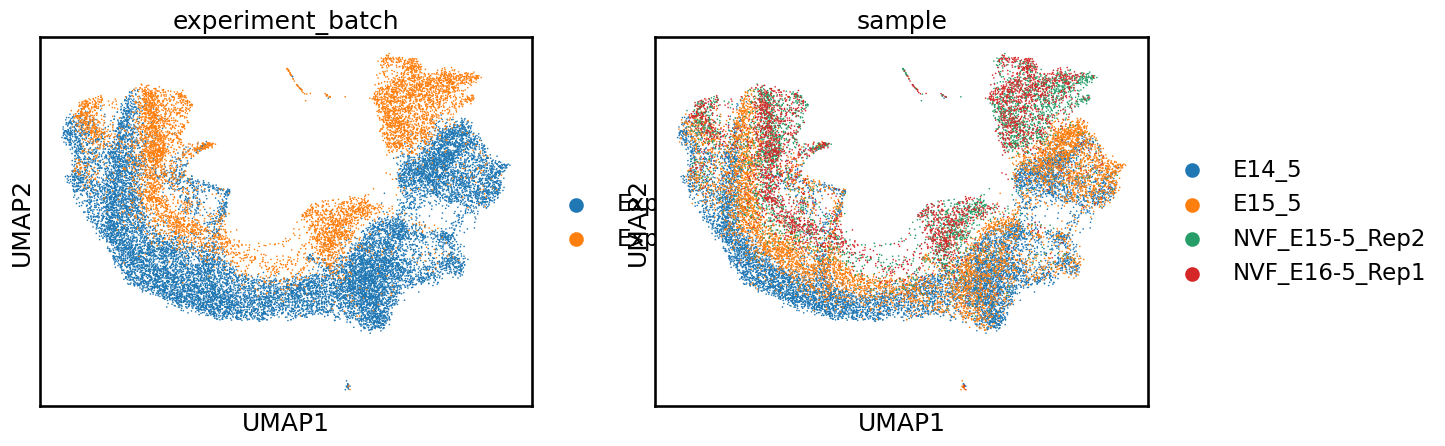

In [65]:
sc.pl.umap(adata_atac,color=["experiment_batch", "sample"])

In [6]:
scvi.model.SCVI.setup_anndata(adata_gex, layer="raw_counts", batch_key="experiment_batch")

<frozen abc>:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [7]:
model = scvi.model.SCVI(adata_gex, n_layers=4, n_latent=30, n_hidden=1024)

In [ ]:
model.train()

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/icb/dominik.klein/mambaforge/envs/scvi-tools/l ...
  rank_zero_warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/icb/dominik.klein/mambaforge/envs/scvi-tools/l ...
  rank_zero_warn(
You are using a CUDA device ('NVID

Epoch 75/353:  21%|██        | 74/353 [04:44<17:26,  3.75s/it, v_num=1, train_loss_step=8.78e+3, train_loss_epoch=9.28e+3]

In [55]:
SCVI_LATENT_KEY = "X_scVI"
adata_gex.obsm[SCVI_LATENT_KEY] = model.get_latent_representation()
sc.pp.neighbors(adata_gex, use_rep=SCVI_LATENT_KEY)
sc.tl.leiden(adata_gex)

NameError: name 'model' is not defined

In [ ]:
sc.pl.umap(adata_gex, color=["experiment_batch", "sample"])

In [ ]:
adata_gex.X = model.get_normalized_expression(adata_gex, library_size=1e4)
sc.pp.log1p(adata_gex)
sc.pp.pca(adata_gex)
sc.pp.neighbors(adata_gex)
sc.tl.umap(adata_gex)
sc.pl.umap(adata_gex, color=["experiment_batch", "sample"])

In [69]:
adata_gex_unintegrated = mudata["rna"].copy()

In [ ]:
adata_gex.obs["experiment_batch"].value_counts()

In [72]:
adata_gex_u_15 = adata_gex_unintegrated[adata_gex_unintegrated.obs["sample"]=="E14_5"].copy()
adata_gex_u_14 = adata_gex_unintegrated[adata_gex_unintegrated.obs["sample"]=="E15_5"].copy()
adata_gex_exp1 = adata_gex_unintegrated[adata_gex_unintegrated.obs["experiment_batch"]==""].copy() 
adata_gex_exp2 = adata_gex_unintegrated[adata_gex_unintegrated.obs["experiment_batch"]==""].copy()

In [70]:
scib.metrics.hvg_overlap(adata_gex_unintegrated[adata_gex_unintegrated], adata_gex, "experiment_batch")

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:252: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scib/metrics/highly_variable_genes.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  hvg_dir[i.obs[batch][0]] = i.var.index[hvg["highly_variable"]]
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:252: FutureWarning: The default

0.676

In [ ]:
scib.metrics.hvg_overlap(adata_gex_u_15, adata_gex_u_14, "experiment_batch")

In [ ]:
scib.metrics.hvg_overlap(adata_gex_u_15, adata_gex_u_14, "experiment_batch")

In [54]:
SCVI_LATENT_KEY = "X_scVI"
adata_gex.obsm[SCVI_LATENT_KEY] = model.get_latent_representation()

In [55]:
SCVI_LATENT_KEY = "X_scVI"
adata_gex.obsm[SCVI_LATENT_KEY] = model.get_latent_representation()
sc.pp.neighbors(adata_gex, use_rep=SCVI_LATENT_KEY)
sc.tl.leiden(adata_gex)

In [56]:
SCVI_MDE_KEY = "X_scVI_MDE"
adata_gex.obsm[SCVI_MDE_KEY] = scvi.model.utils.mde(adata_gex.obsm[SCVI_LATENT_KEY])

INFO     Using cuda:0 for `pymde.preserve_neighbors`.                                                              


/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/icb/dominik.klein/mambaforge/envs/scvi-tools/l ...
  rank_zero_warn(


In [58]:
adata_gex.X = model.get_normalized_expression(adata_gex, library_size=1e4)

In [59]:
adata_gex.X = model.get_normalized_expression(adata_gex, library_size=1e4)
sc.pp.log1p(adata_gex)
sc.pp.pca(adata_gex)
sc.pp.neighbors(adata_gex)
sc.tl.umap(adata_gex)
sc.pl.umap(adata_gex, color=["Hhex",  "Isl1"])

In [60]:
sc.pp.neighbors(adata_gex)

In [61]:
sc.tl.umap(adata_gex)

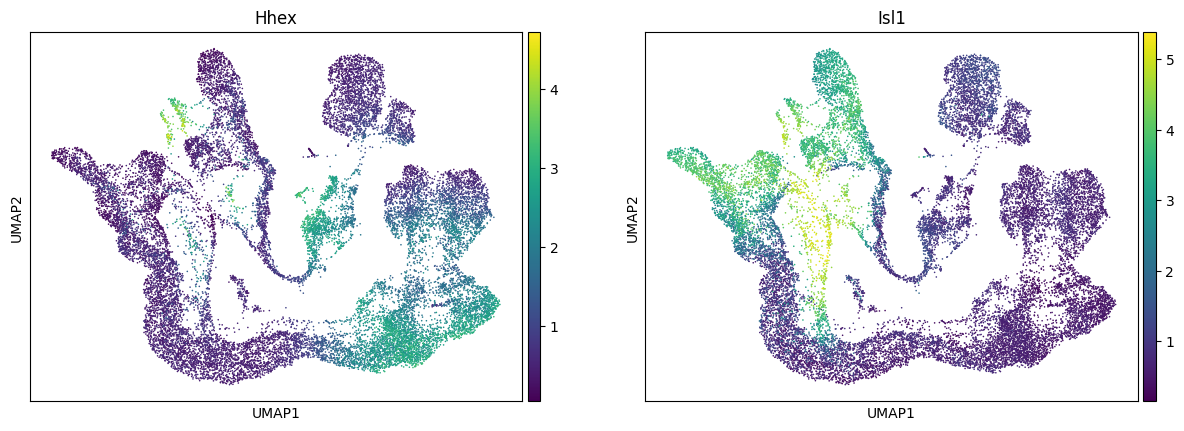

In [66]:
sc.pl.umap(adata_gex, color=["Hhex",  "Isl1"])

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing thi

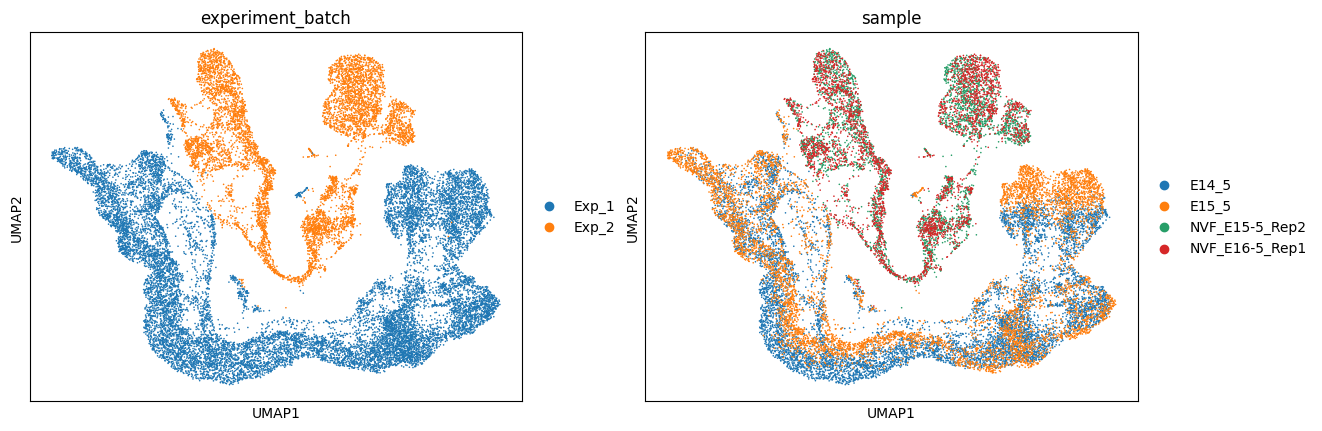

In [67]:
sc.pl.umap(adata_gex, color=["experiment_batch", "sample"])

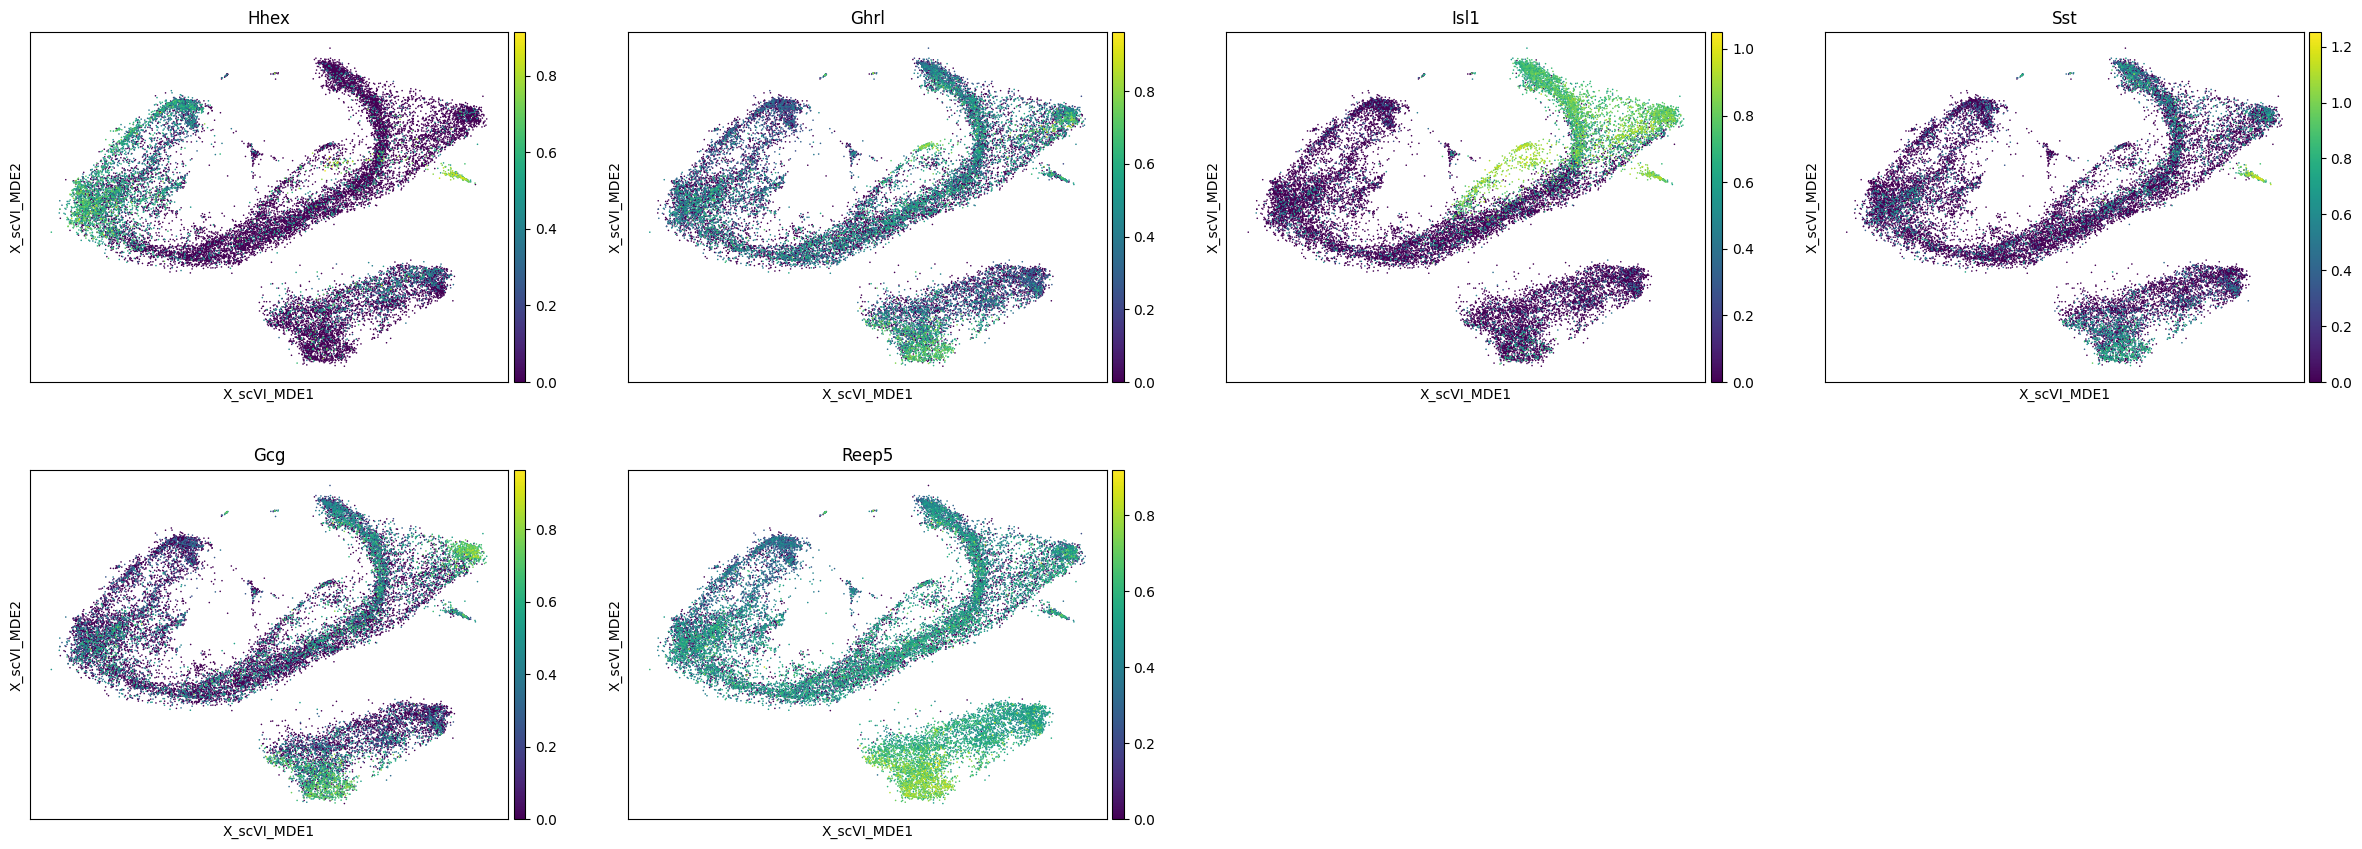

In [125]:
sc.pp.normalize_total(adata_gex)
sc.pp.log1p(adata_gex)
sc.pl.embedding(adata_gex, basis=SCVI_MDE_KEY, color=["Hhex", "Ghrl", "Isl1", "Sst", "Gcg", "Reep5"])

In [120]:
adata_gex.layers

Layers with keys: ambiguous, log_raw_counts, matrix, raw_counts, scran_counts, sct_counts, sct_logcounts, sct_scale_data, spliced, unspliced

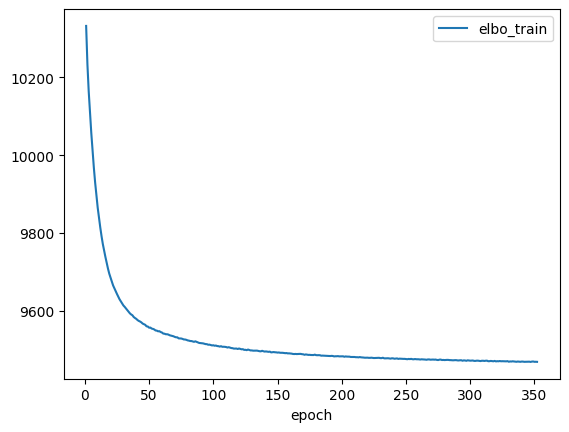

In [116]:
train_elbo = model.history["elbo_train"][1:]

ax = train_elbo.plot()


In [115]:
model.history.keys()

dict_keys(['kl_weight', 'train_loss_step', 'train_loss_epoch', 'elbo_train', 'reconstruction_loss_train', 'kl_local_train', 'kl_global_train'])

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


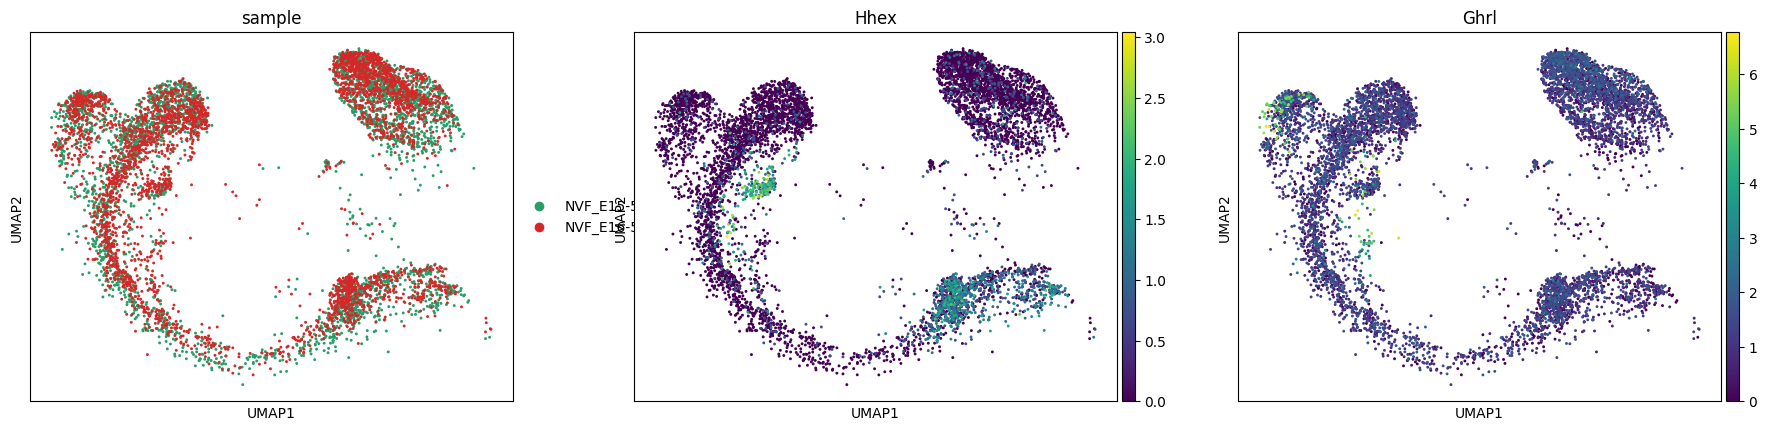

In [18]:
mu.pl.umap(mudata["rna"][mudata.obs["sample"].isin(("NVF_E15-5_Rep2", "NVF_E16-5_Rep1"))], color=["sample", "Hhex", "Ghrl"])

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


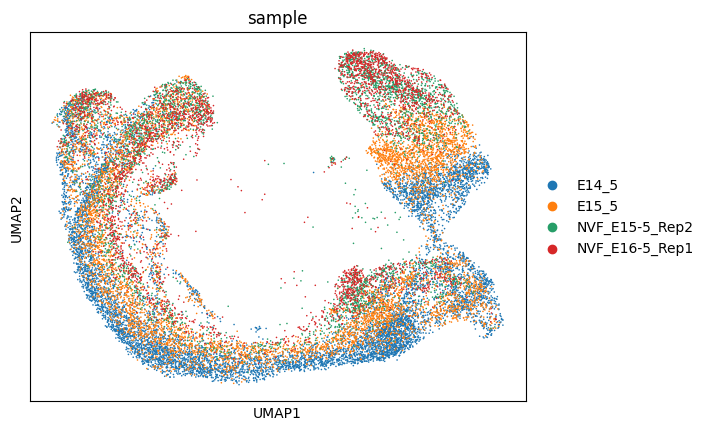

In [25]:
mu.pl.umap(mudata["rna"], color=["sample"])

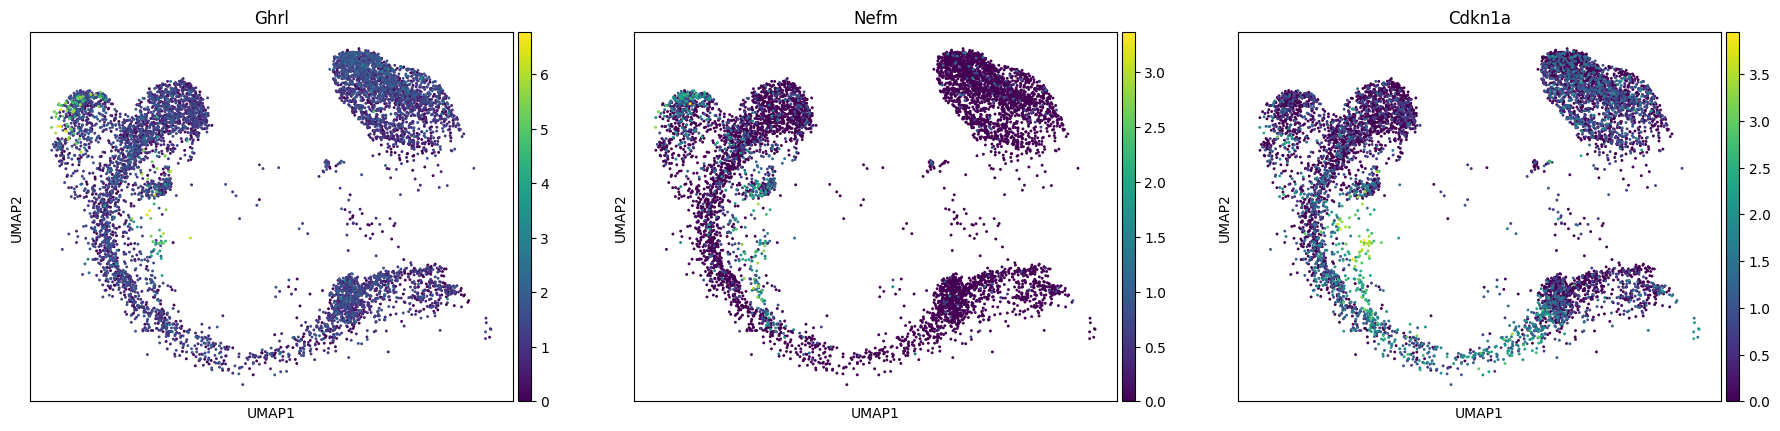

In [23]:
mu.pl.umap(mudata["rna"][mudata.obs["sample"].isin(("NVF_E15-5_Rep2", "NVF_E16-5_Rep1"))], color=["Ghrl", "Nefm", "Cdkn1a"])

In [26]:
import torch

In [30]:
mudata["rna"].var["is_ambient_E15_5-1"].value_counts()

is_ambient_E15_5-1
False    19993
True       249
Name: count, dtype: int64

In [93]:
bdata = mudata["rna"][:,(mudata["rna"].var["is_ambient_E15_5-1"]=="False")]

In [94]:
bdata.X = bdata.layers["raw_counts"].A



In [95]:
sc.pp.normalize_total(bdata)


/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [96]:
sc.pp.log1p(bdata)

In [97]:
sc.tl.umap(bdata)

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


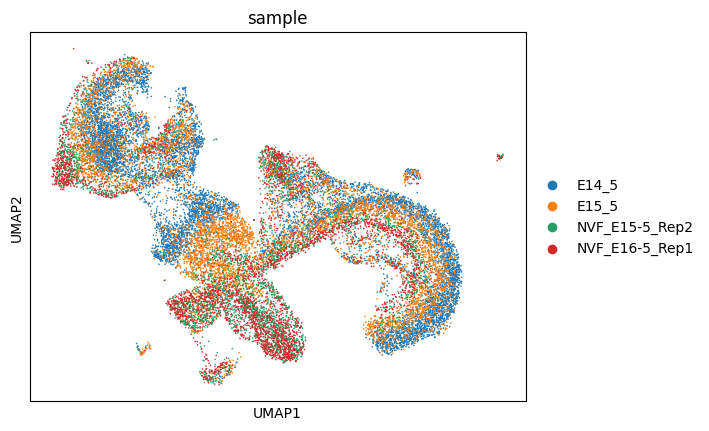

In [98]:
sc.pl.umap(bdata, color="sample")

In [77]:
mudata.obsm

MuAxisArrays with keys: X_MultiVI, atac, rna

In [78]:
sc.pp.neighbors(mudata, use_rep="X_MultiVI")

In [79]:
sc.tl.umap(mudata)

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


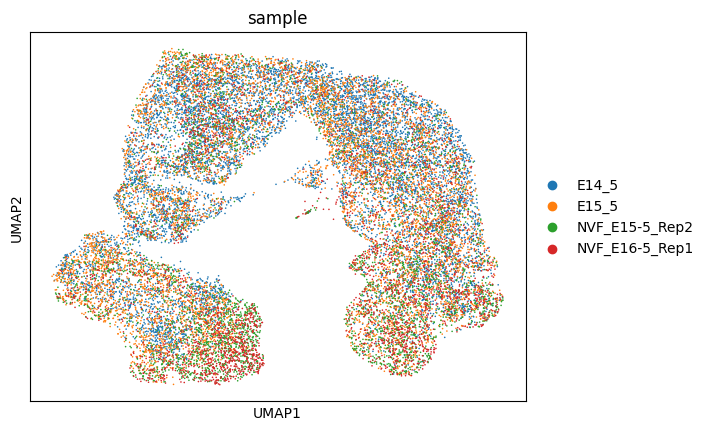

In [80]:
sc.pl.umap(mudata, color="sample")

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


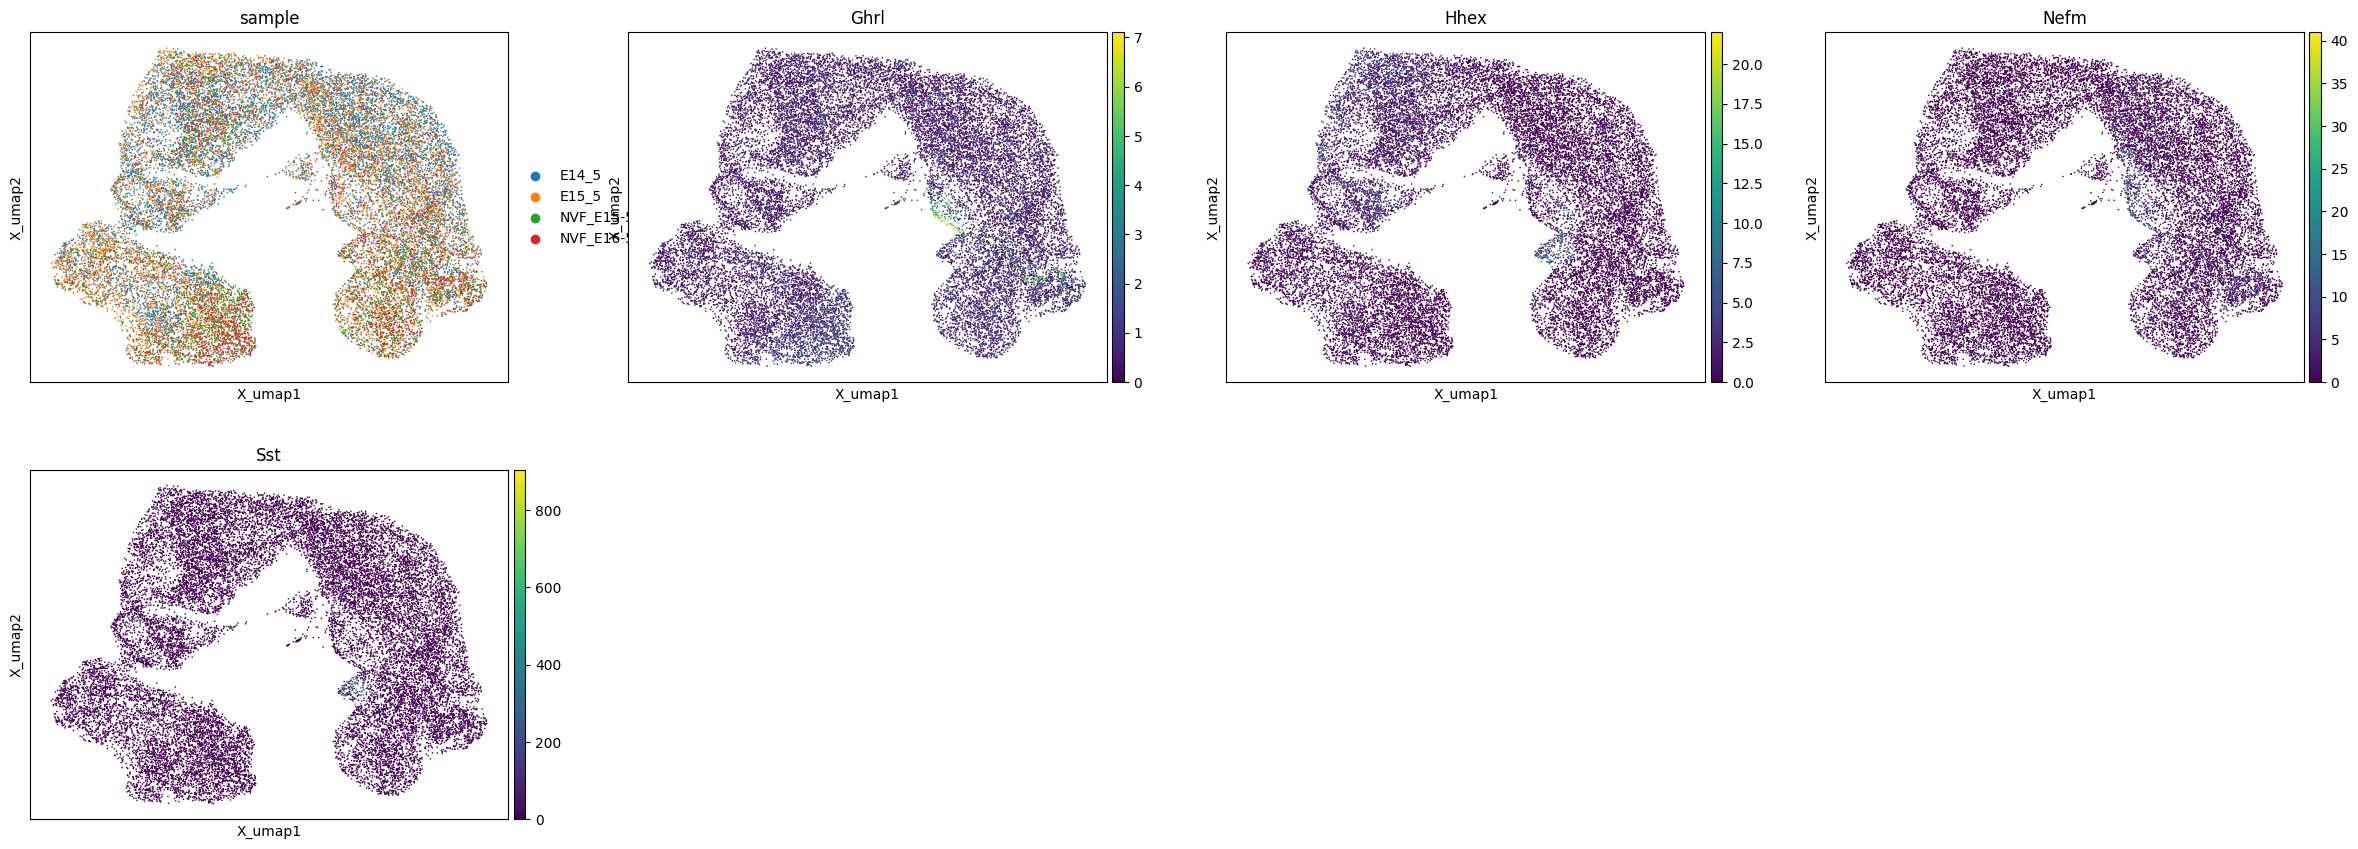

In [84]:
mu.pl.umap(mudata, color=["sample", "Ghrl", "Hhex", "Nefm", "Sst"])

In [137]:
adata_atac= mudata["atac"]

In [141]:
adata_atac.obsm["X_lsi"].shape

(22653, 49)

In [143]:
for i in range(49):
    print(np.corrcoef(adata_atac.obsm["X_lsi"][:,i], adata_atac.obs["n_counts_ATAC"])[0,1])

0.22816471018442283
-0.10072354121061593
0.04780504701113746
0.6681617506046
-0.28233608982442177
0.018316826354543576
-0.03590049401990984
0.03816205064313912
0.1418025238664359
0.13243719977550633
-0.07047628969823251
-0.0864793990967911
-0.12405145966079861
0.046430573720217104
0.01179477958537139
0.005054085204234318
0.1030534963356493
-0.006305828053928206
-0.03687589853759594
-0.12665897056413838
-0.05952608570184218
0.0036715386099481365
0.014099620781362641
0.11796661731279418
-0.18044615276375411
-0.1556980392288322
-0.007085228357752318
-0.003965736186989689
0.05395962336925338
0.03741093187836117
-0.07203311023072118
0.08875959123147577
0.002794523187730495
0.028603398174923553
0.034260710332309714
-0.000795333501924667
0.03760581718985225
-0.02122091953612502
0.05794257540288393
0.05009378284392614
0.03438989301484394
-0.020574014411207743
0.0804520976070462
0.05812359271790899
-0.0031279190475625635
-0.02440524308411531
-0.07588542351522382
-0.0774003202610859
0.0482886148

In [144]:
sc.pp.neighbors(adata_atac, use_rep="X_lsi")

In [145]:
sc.tl.umap(adata_atac)

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


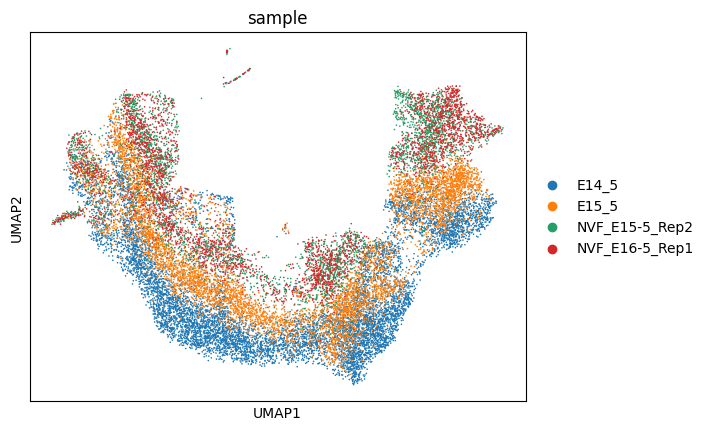

In [146]:
sc.pl.umap(adata_atac, color="sample")

In [154]:
range(adata_atac.shape[1])

range(0, 251676)

In [155]:
adata_atac.obsm["lsi_red"] = adata_atac.obsm["X_lsi"][:, list(set(range(adata_atac.obsm["X_lsi"].shape[1]))-{3})]

In [157]:
sc.pp.neighbors(adata_atac, use_rep="lsi_red")

In [158]:
sc.tl.umap(adata_atac)

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


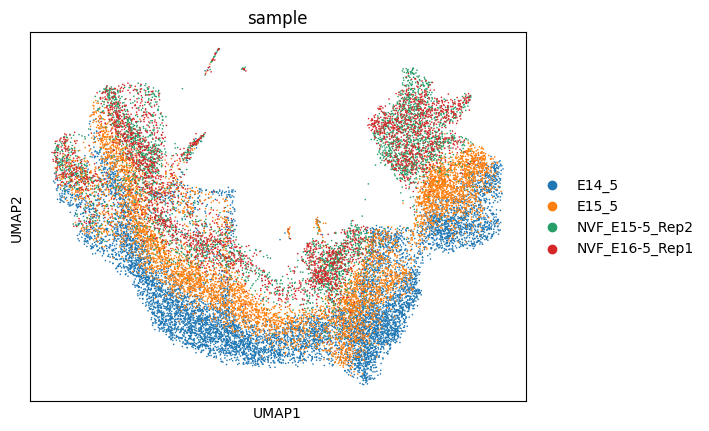

In [159]:
sc.pl.umap(adata_atac, color="sample")